<a href="https://colab.research.google.com/github/ilyayath/imdb-classification/blob/main/1_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [2]:
train = pd.read_csv('/content/train_df.csv')
test = pd.read_csv('/content/test_df.csv')

In [3]:
X_train = train['text']
y_train = train['label']
X_test,X_val,y_test,y_val = train_test_split(test['text'],test['label'],test_size=0.5,stratify=test['label'],random_state = 42)

In [4]:
pipeline_logreg = Pipeline([('tf-idf',TfidfVectorizer()),('log-reg',LogisticRegression())])
pipeline_logreg.fit(X_train, y_train)
pred = pipeline_logreg.predict(X_val)
classification_report(y_val,pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88      6250\n           1       0.88      0.88      0.88      6250\n\n    accuracy                           0.88     12500\n   macro avg       0.88      0.88      0.88     12500\nweighted avg       0.88      0.88      0.88     12500\n'

In [5]:
feature_names = pipeline_logreg.named_steps['tf-idf'].get_feature_names_out()
coefs = pipeline_logreg.named_steps['log-reg'].coef_[0]

Тут coef_[0] — це масив ваг для позитивного класу (для бінарної класифікації).
Позитивні значення → слова, що збільшують ймовірність позитивного класу.
Негативні значення → слова, що збільшують ймовірність негативного класу.

In [6]:
top_pos_idx = np.argsort(coefs)[-10:]
top_pos_words = feature_names[top_pos_idx]
top_pos_coefs = coefs[top_pos_idx]

In [7]:
top_pos_words

array(['highly', 'fun', 'enjoy', 'wonderful', 'favorite', 'perfect',
       'best', 'love', 'excellent', 'great'], dtype=object)

In [8]:
low_pos_idx = np.argsort(coefs)[:10]
low_pos_words = feature_names[low_pos_idx]
low_pos_coefs = coefs[low_pos_idx]

In [9]:
low_pos_words

array(['bad', 'waste', 'awful', 'poor', 'boring', 'nothing', 'terrible',
       'dull', 'horrible', 'poorly'], dtype=object)

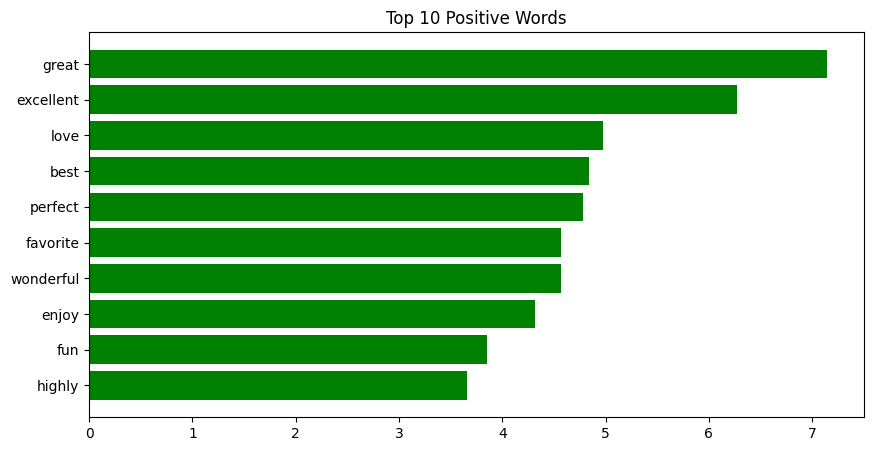

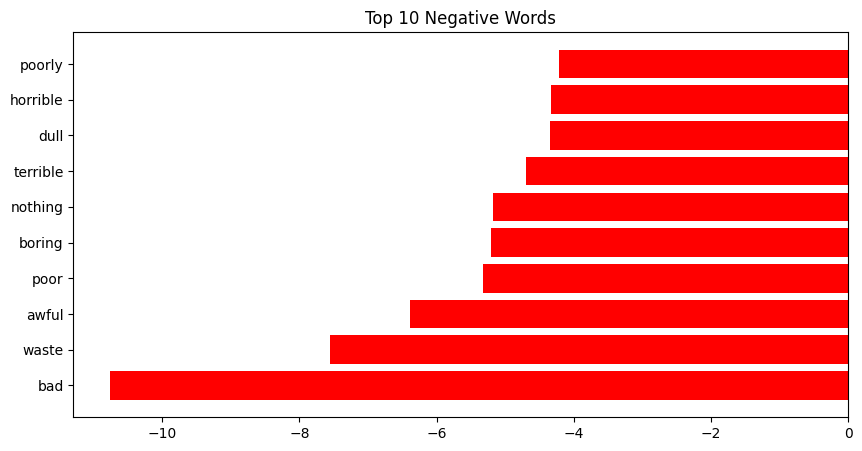

In [10]:
plt.figure(figsize=(10,5))
plt.barh(top_pos_words, top_pos_coefs, color='green')
plt.title('Top 10 Positive Words')
plt.show()

plt.figure(figsize=(10,5))
plt.barh(low_pos_words, low_pos_coefs, color='red')
plt.title('Top 10 Negative Words')
plt.show()

In [11]:
pipelines = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=200))
    ]),
    "Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    "Linear SVC": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LinearSVC())
    ])
}

In [12]:
result = []

In [13]:
for model, pipeline in pipelines.items():
  pipeline.fit(X_train,y_train)
  preds = pipeline.predict(X_val)
  accuracy = accuracy_score(y_val,preds)
  precision = precision_score(y_val,preds)
  recall = recall_score(y_val,preds)
  f1 = f1_score(y_val,preds)
  result.append({'Model': model,
                 'Accuracy' : accuracy,
                 'Precision' : precision,
                 'Recall' : recall,
                 'F1' : f1
                 })



In [14]:
results_df = pd.DataFrame(result).sort_values(by='F1', ascending=False)

In [15]:
results_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.87808,0.876874,0.87968,0.878275
2,Linear SVC,0.86688,0.876890,0.85360,0.865088
1,Naive Bayes,0.82776,0.865608,0.77600,0.818358
